# Laboratorio 3: Análisis de señales

En el marco del Laboratorio 3, analizaremos las señales provenientes de un sistema real. Este estudio se centra en la comparación de dichas señales con los datos recopilados por un analizador de red, permitiéndonos así verificar su funcionamiento y aplicar conocimientos fundamentales, como el uso de la Transformada de Fourier.

Es esencial instalar el software PQ ONE, que constituye la plataforma integral para el análisis de los resultados obtenidos mediante el analizador de líneas. Para acceder a este software, se proporciona el siguiente [enlace](https://www.hioki.com/global/support/download/software/versionup/detail/id_562) de descarga. El archivo se llama: `Application (PQONE_V1002.zip)`.

1. El objetivo primordial de este estudio es validar la precisión de los resultados comparando los resultados obtenido.
2. Mediante la Transformada de Fourier. Se evaluarán parámetros como armónicos, densidad espectral.
3. Análisis y obtención de parámetros eléctricos.

Finalmente, para dar inicio con este análisis se requiere cargar los datos `data_event.csv`, disponibles en la carpeta del desarrollo de la práctica. Se recomienda leer los datos a través de dataframes utilizando las librerías de `pandas`.


## Setup

In [ ]:
def voltage_plots(U_12, U_23, U_31):
  plt.figure(figsize=(12, 4))
  plt.plot(U_12, label='U12')
  plt.plot(U_23, label='U23')
  plt.plot(U_31, label='U31')
  plt.legend()
  # plt.xlabel('Muestras')
  plt.ylabel('Tensión')
  plt.title('Señales de tensión [V]')
  plt.xlim(0, 300)
  plt.grid(True)
  plt.show()


def current_plots(I_1, I_2, I_3):
  plt.figure(figsize=(12, 4))
  plt.plot(I_1, label='I1')
  plt.plot(I_2, label='I2')
  plt.plot(I_3, label='I3')
  plt.legend()
  # plt.xlabel('Muestras')
  plt.ylabel('Corriente')
  plt.title('Señales de corriente [A]')
  plt.xlim(0, 300)
  plt.grid(True)
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq

# **Actividad 1:**



## Adquisición de Eventos

En el marco de este análisis, el conjunto de datos denominado data encapsula las mediciones de señales de voltaje y corriente obtenidas durante el proceso de adquisición. Se plantea la tarea de examinar un único evento, representado por un conjunto de muestras que originalmente consta de aproximadamente 4600 puntos. La estrategia propuesta implica la truncación de este conjunto, extrayendo muestras en dos rangos específicos: inicialmente, se truncan las muestras 300 y 2000, seguido por un segundo truncamiento entre 2000 y 4000. Este enfoque tiene como objetivo un análisis de las características y comportamientos del evento en cuestión, de acuerdo al truncamiento realizado.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Lab3_SA/data_event.csv', sep=';').drop(['Time', 'Date', 'U4', 'I4'], axis=1)
print(data.columns)
data_E1 = data[data['EventNo'] == 1]
data_E1

Index(['EventNo', 'U12', 'U23', 'U31', 'I1', 'I2', 'I3'], dtype='object')


,EventNo,U12,U23,U31,I1,I2,I3
0,1,-0.99,-94.10,95.20,-2.150,-1.950,3.540
1,1,2.83,-75.50,72.60,-1.970,-1.900,3.360
2,1,-3.20,-8.62,11.90,-0.916,-0.862,1.240
3,1,-0.61,9.04,-8.34,-0.229,0.107,-0.389
4,1,51.40,-53.70,2.26,0.328,-1.320,0.496
...,...,...,...,...,...,...,...
4663,1,-5.13,10.60,-5.37,-0.488,-0.313,0.305
4664,1,5.23,-1.74,-3.44,-0.191,0.038,-0.328
4665,1,63.00,-65.70,2.64,0.450,-1.830,0.870
4666,1,95.80,-94.80,-1.08,1.340,-3.620,1.700


## Visualización de las Señales

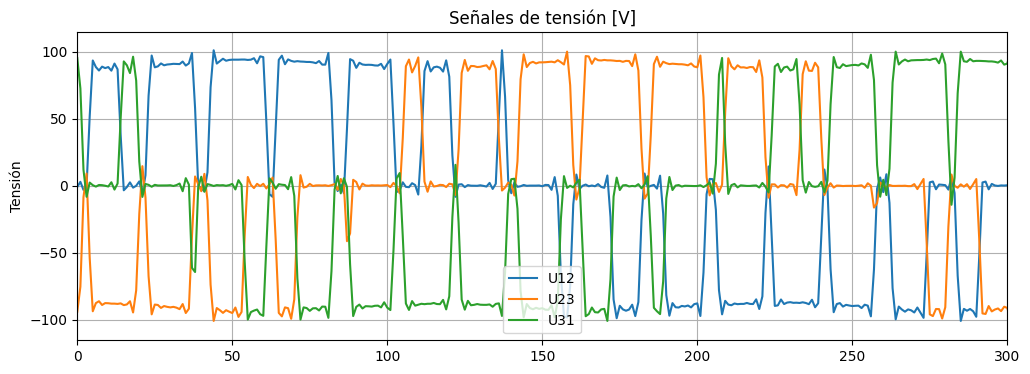

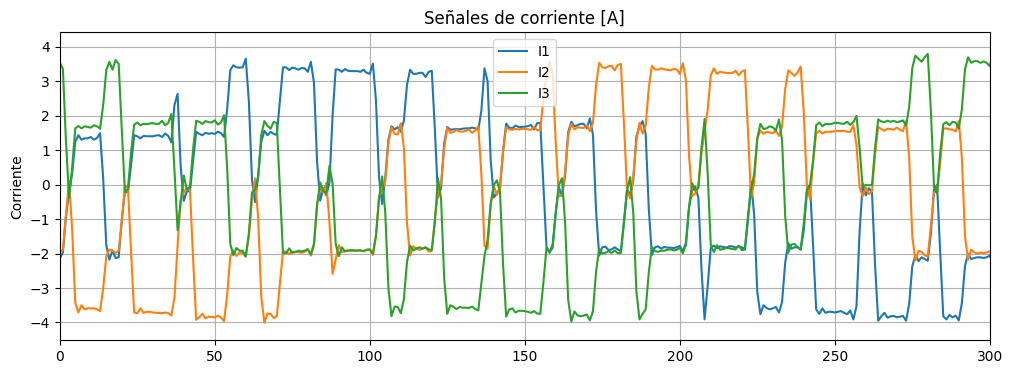

In [ ]:
# Obtenga las señales de tensión
U_12 = 0
U_23 = 0
U_31 = 0

# Obtenga las señales de corriente
I_1 = 0
I_2 = 0
I_3 = 0


voltage_plots(U_12, U_23, U_31)
current_plots(I_1, I_2, I_3)

# **Actividad 2:**

## Análisis de Densidad Espectral con SciPy

Para el análisis de densidad espectral de las señales de tensión y corriente, se recomienda utilizar las funciones `rfft` y `rfftfreq` de la sublibrería `scipy.fft`. Estas herramientas simplifican el cálculo de las transformadas de Fourier y la obtención de frecuencias asociadas. La aplicación de estas funciones permite condensar la información de armónicos, facilitando su representación gráfica en la densidad espectral. La visualización resultante ofrece un análisis eficiente de la frecuencia fundamental en el conjunto de datos, profundizando la comprensión de las características subyacentes de las señales eléctricas.

In [ ]:
def plot_fft(yf, T, U_k, signal_name):
    """
    Grafica la densidad espectral de frecuencia utilizando la transformada de Fourier.

    Parámetros:
    - yf (array): Coeficientes de la transformada de Fourier.
    - T (float): Período de muestreo.
    - U_k (array): Tensiones o corrientes (U12, U23, U31, I1, I2, I3).
    - signal_name (str): Nombre de la señal.

    Retorna:
    - None
    """
    # Tamaño de muestras
    N = len(np.zeros())
    # Eje de frecuencias, tener en cuenta solo la parte positiva del espectro de frecuencias
    xf = fftfreq(N, T)[:N//2]

    # --- Realice la gráfica utilizando un stem



    # ---

# Frecuencia de muestreo
fs = 20000

# Periodo
T = 1.0 / fs

# Utilice la FFT
yf_U_12 = 0
yf_U_23 = 0
yf_U_31 = 0

plot_fft(yf_U_12, T, U_12, 'U_12')
plot_fft(yf_U_23, T, U_23, 'U_23')
plot_fft(yf_U_31, T, U_31, 'U_31')

## Exploración de Armónicos mediante Transformada de Fourier

Con el desafío de comparar los resultados provenientes de su propio análisis (PQ1) y la aplicación de la transformada de Fourier, se plantea la tarea de elaborar una tabla detallada que contemple cada armónico presente en las señales de tensión (U12, U23, U31) junto con sus magnitudes y frecuencias respectivas.

In [ ]:
# Tamaño de muestras totales
N = len(data_E1)
T = 1.0 / 20000

# Dominio de frecuencias
xf = fftfreq(N, T)[:N//2]

# Realice una tabla donde ordene los armónicos desde el fundamental y se pueda ver
# los valores en magnitud correspondientes por cada armónico
# para cada señal de tensión y corriente
armonicos = pd.DataFrame({'Harm':np.arange(1,51),
                          'Frec':np.zeros(),
                          'U12':np.zeros(),
                          'U23':np.zeros(),
                          'U31':np.zeros()})
armonicos = armonicos.set_index('Harm')
armonicos

### Valores en RMS

Como parte adicional, se solicita a los estudiantes convertir los valores obtenidos a RMS (Root Mean Square) en la exploración de armónicos utilizando la transformada de Fourier.

In [ ]:
armonicos_rms = np.zeros()
armonicos_rms

## Visualización de Armónicos en RMS
La siguiente actividad consiste en visualizar los armónicos convertidos a valores RMS, permitiendo así una comparación con los datos proporcionados por PQ1.

In [ ]:
# Visualización Armónicos en RMS emplee los diagramas de barras de Matplotlib
# ---



# ---
plt.title('Armonicos')
plt.xlabel('Armonico')
plt.ylabel('Voltaje')
plt.legend()
plt.show()

# **Actividad 3:**

## Valores RMS de Tensiones y Corrientes

In [ ]:
# Use la rfft en las señales para obtener los armónicos
V1 = rfft(np.zeros(1))
I1 = rfft(np.zeros(1))


# Determine los valores RMS de corriente y tensión a través de los armónicos

# --- Tensión
U12_rms = np.sqrt(np.zeros(1))
U23_rms = np.sqrt(np.zeros(1))
U31_rms = np.sqrt(np.zeros(1))

# --- Corriente
I1_rms = np.sqrt(np.zeros(1))
I2_rms = np.sqrt(np.zeros(1))
I3_rms = np.sqrt(np.zeros(1))

## Factor de Distorsión Armónica (THD)

En esta etapa del análisis, nos enfocaremos en evaluar el Total Harmonic Distortion (THD) de las señales de tensión y corriente. El THD es una métrica esencial que cuantifica la presencia de armónicos no deseados en relación con la componente fundamental.

La fórmula para calcular el THD se expresa como:

$$THD_{ki}=\frac{\sqrt{\sum_{i=1}^{n} V_{1}^2}}{V_{ki}} \cdot 100$$



In [ ]:
# Calculo de THD
# Se calcula el THD de las tensiones y corrientes utilizando los armónicos
# almacenados en 'armonicos' anteriormente. Recuerde indexar por cada señal
# de tensión y corriente

THD1 = (np.zeros(1))
THD2 = (np.zeros(1))
THD3 = (np.zeros(1))

## Apartado de Potencias

### Potencia instantanea

In [ ]:
# Se propone definir completar la siguiente función utilizando matplotlib
# para graficar las señales de potencia instántanea
def plot_pot(P, pot):
    """
    Grafica la señal de potencia instantánea y muestra líneas punteadas
    para la media y el valor máximo de la señal.

    Parámetros:
    - P (array): Señal de potencia instantánea.
    - pot (str): Identificador de la carga.

    Retorna:
    - None
    """
    plt.figure(figsize=(12, 4))
    plt.plot(P, label='Potencia Instantánea')

    # Calcular y mostrar la media y el valor máximo
    mean_value = np.zeros(1)
    max_value = np.zeros(1)

    plt.ylabel('Potencia')
    plt.title(f'Señales de potencia instantánea')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

### Potencia media

In [ ]:
# Calculo de las potencias activas con la definicion de potencia media
def pmed(P):
    """
    Calcula el valor medio de una lista de valores.
    Parámetros:
    - P (list): Lista de valores para la cual se desea calcular el valor medio.
    Retorna:
    - float: Valor medio de la lista de valores.
    """
    pmean = 0
    # ---


    # ---

### Potencia activa con armónicos

$$P = \frac{\sum V_{k} I_{k} \cos(\theta_{v}-\theta_{i})}{2}$$

In [ ]:
# Calculo de las potencias activas con los armonicos
P1 = np.zeros(1)
P2 = np.zeros(1)
P3 = np.zeros(1)

### Potencia reactiva con armónicos

$$Q = \frac{\sum V_{k} I_{k} \sin(\theta_{v}-\theta_{i})}{2}$$

In [ ]:
# Calculo de las potencias reactivas con los armonicos
Q1 = np.zeros(1)
Q2 = np.zeros(1)
Q3 = np.zeros(1)

### Potencia aparente

$$S=\sqrt{\sum \frac{V_{k}^2}{2}\cdot\sum \frac{I_{k}^2}{2}}$$

In [ ]:
# Calculo de las potencias aparentes con los armonicos
S1 = np.zeros(1)
S2 = np.zeros(1)
S3 = np.zeros(1)

### Potencia de distorsión armónica

$$D = \sqrt{S^2 - P^2 - Q^2}$$

In [ ]:
# Calculo de las potencias de distorsión armonicas
D1 = np.zeros(1)
D2 = np.zeros(1)
D3 = np.zeros(1)

## Factor de potencia

In [ ]:
# Calculo del factor de potencia
fp1 = 0
fp2 = 0
fp3 = 0

# **Actividad 4. Visualización de Resultados:**

### Triángulos de Potencia

In [ ]:
# Realice aquí un código funcional para visualizar el triangulo de potencias para
# tensiones y corrientes puede ayudarse de herramientas como Matplotlib o Ploty

## Diagramas Fasoriales

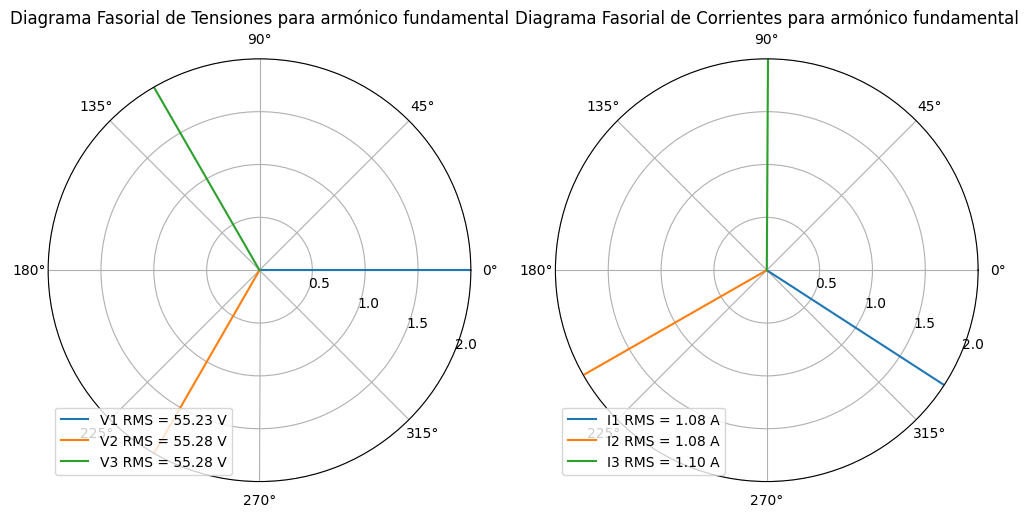

In [ ]:
# Realice aquí un código funcional para visualizar los diagramas fasoriales para el armónico
# fundamental en las tensiones y corrientes